In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")
import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
import re
import cv2



In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pandas/BanglabBI.csv')
data.head(10)

,Unnamed: 0,Comment,label
0,0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Bully
1,1,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছি...,Not bully
2,2,অরে বাবা এই টা কোন পাগল,Not bully
3,3,ক্যাপ্টেন অফ বাংলাদেশ,Not bully
4,4,পটকা মাছ,Bully
5,5,অন্যরকম ভালো লাগলো,Not bully
6,6,সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...,Bully
7,7,মোহাম্মদ কফিল উদ্দীন মাহমুদ,Not bully
8,8,ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...,Bully
9,9,হিরো আলম তুমি এগিয়ে চলো আমরা আছি তোমার সাথে,Not bully


In [ ]:

data.Comment[8]

'ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে জানতে পারলাম  এই সবই আল্লাহর গজব  ফাবি আইয়ে আলায়ে রাব্বি কুমাতু কায্জিবান'

In [ ]:
df1 = data.drop('Unnamed: 0', axis=1)

In [ ]:
df1

,Comment,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Bully
1,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছি...,Not bully
2,অরে বাবা এই টা কোন পাগল,Not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,Not bully
4,পটকা মাছ,Bully
...,...,...
43996,হিরো আলম এগিয়ে যাও,Not bully
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Not bully
43998,হিরো ভাই তুমি এগিয়ে য়াও,Not bully
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Not bully


In [ ]:
!pip install genism

ERROR: Could not find a version that satisfies the requirement genism (from versions: none)
ERROR: No matching distribution found for genism


In [ ]:
df1['cleaned']=df1['Comment']

In [ ]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/NLP Projects/'
import warnings
warnings.filterwarnings(action='ignore',category=UserWarning,module='gensim')
warnings.filterwarnings(action='ignore',category=FutureWarning,module='gensim')

In [ ]:
import re
import nltk
from gensim.models import word2vec
import re
import nltk
from gensim.models import word2vec
from tensorflow import keras
from tqdm import tqdm
import nltk
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [ ]:
sentences =[]
for t in  tqdm(range(len(df1['cleaned']))):
    text = nltk.word_tokenize(df1['cleaned'][t])
    sentences.append(text)

100%|██████████| 44001/44001 [00:17<00:00, 2473.92it/s]


In [ ]:
from tqdm import tqdm
import nltk
import regex

sentences = []

# Bengali Unicode range: U+0980 to U+09FF
bengali_pattern = regex.compile(r"[\p{Bengali}]+")

for t in tqdm(range(len(df1['cleaned']))):
    text = nltk.word_tokenize(df1['cleaned'][t])
    filtered_sentence = [word for word in text if len(word) >= 3 and bengali_pattern.match(word)]
    sentences.append(filtered_sentence)

100%|██████████| 44001/44001 [00:18<00:00, 2390.49it/s]


In [ ]:
sentences

[['হালার',
  'পুত',
  'এখন',
  'খাওয়ার',
  'সময়',
  'রাতের',
  'বেলা',
  'খাই',
  'দিনের',
  'বেলাও',
  'মাঝেমধ্যে',
  'খায়',
  'এখন',
  'সময়',
  'একটু',
  'চুদাম',
  'যার',
  'ইচ্ছা',
  'আছে',
  'চুদার',
  'লাইনে',
  'দারা',
  'একজন',
  'একজন',
  'করে',
  'জাবি'],
 ['ঘরে', 'বসে', 'শুট', 'করতে', 'কেমন', 'লেগেছে', 'ক্যামেরাতে', 'ছিলেন'],
 ['অরে', 'বাবা', 'কোন', 'পাগল'],
 ['ক্যাপ্টেন', 'বাংলাদেশ'],
 ['পটকা', 'মাছ'],
 ['অন্যরকম', 'ভালো', 'লাগলো'],
 ['সাংবাদিক',
  'ভাইদের',
  'বলছি',
  'সংবাদ',
  'গুলি',
  'প্রচার',
  'করলেই',
  'গ্রেডের',
  'অভিনেত্রী',
  'অভিনেতা',
  'দের',
  'আপনারা',
  'জনপ্রিয়',
  'শব্দটা',
  'কেন',
  'ব্যবহার',
  'করছেন',
  'এরা',
  'জনপ্রিয়',
  'এরা',
  'কাস্টিং',
  'কাউচের',
  'সুযোগে',
  'অভিনেত্রী',
  'অভিনেতা',
  'প্লিজ',
  'তেলবাজি',
  'নিউজ',
  'এদের',
  'ইম্পোরটেন্ট',
  'দেয়া',
  'বন্ধ',
  'করুন'],
 ['মোহাম্মদ', 'কফিল', 'উদ্দীন', 'মাহমুদ'],
 ['ঢাকায়',
  'ঘনো',
  'ঘনো',
  'আগুন',
  'লাগার',
  'মূল',
  'কারন',
  'এতদিনে',
  'জানতে',
  'পারলাম',
  'সবই',
  '

In [ ]:
import re
import nltk
from gensim.models import word2vec
from tensorflow import keras
from tqdm import tqdm
import nltk

In [ ]:
import multiprocessing

In [ ]:
#Train a Word2Vec model using Gensim
import gensim
Embedding_Dim = 100
#train word2vec model
model = word2vec.Word2Vec(sentences, vector_size = Embedding_Dim,window=5, min_count=2,negative=3,workers=multiprocessing.cpu_count()-1,sg=0)
#Vocabulary size
words = list(model.wv.key_to_index)
print('Here is the Vocabulary Size.. %d' % len(words))

Here is the Vocabulary Size.. 22740


In [ ]:
words

['করে',
 'নাস্তিক',
 'বিশ্বাস',
 'আল্লাহ',
 'তুই',
 'কথা',
 'আপনি',
 'আমি',
 'আপনার',
 'তার',
 'জন্য',
 'থেকে',
 'একটা',
 'তোর',
 'নাই',
 'সাফা',
 'হিরো',
 'আমার',
 'তুমি',
 'কাছে',
 'ভাই',
 'আছে',
 'হবে',
 'কোন',
 'আলম',
 'কিছু',
 'ভালো',
 'করতে',
 'যদি',
 'বলে',
 'ক্ষমা',
 'অনেক',
 'এখন',
 'তোমার',
 'তাহলে',
 'মানুষ',
 'করেন',
 'মনে',
 'করা',
 'কবির',
 'দিয়ে',
 'আমরা',
 'কিন্তু',
 'মাগি',
 'হয়ে',
 'এটা',
 'তাই',
 'আল্লাহর',
 'ভুল',
 'আবার',
 'আমাদের',
 'নিয়ে',
 'আপনাকে',
 'এবং',
 'সাথে',
 'পরকাল',
 'সুন্দর',
 'সবাই',
 'করি',
 'তাকে',
 'কেন',
 'কমেন্ট',
 'কেউ',
 'বাবা',
 'যায়',
 'যারা',
 'করার',
 'দেখে',
 'খান',
 'করুন',
 'দান',
 'নাকি',
 'একজন',
 'নাটক',
 'মতো',
 'নাস্তিকের',
 'তাদের',
 'ধন্যবাদ',
 'বাচ্চা',
 'এমন',
 'ঠিক',
 'নিজের',
 'বিচার',
 'মুসলিম',
 'আগে',
 'পারে',
 'সেটা',
 'গালি',
 'কোনো',
 'জন্ম',
 'দিন',
 'হেদায়েত',
 'নেই',
 'তারা',
 'বলতে',
 'পরকালে',
 'আমিন',
 'সেই',
 'করুক',
 'খুব',
 'ইসলাম',
 'হলে',
 'দেখা',
 'মানুষের',
 'মেয়ে',
 'সময়',
 'জুতা',
 'পাগল',
 'করবে',
 'কাজ'

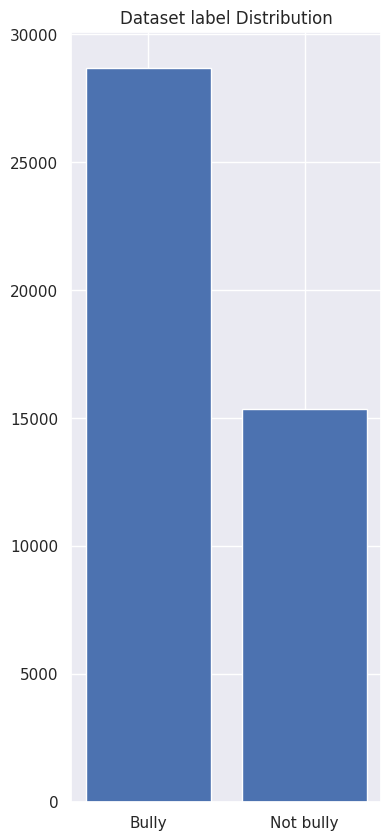

In [ ]:
# First let's visualize the distribution of categories in the dataset
import numpy as np
categories, ccount = np.unique(df1.label, return_counts=True)

# Using a figsize this big seems dirty. It's the only way I figured to make
# the x labels not overlap. I suck at plotting, sorry
plt.figure(figsize=(4, 10))
plt.title("Dataset label Distribution")
plt.bar(categories, ccount, align='center')
plt.show()

In [ ]:
#Finding similar words
print(model.wv.most_similar('জান্নাত', topn=5))

[('বেহেস্ত', 0.9606032371520996), ('জাহান্নাম', 0.9563689231872559), ('ইত্যাদির', 0.9553130865097046), ('হেদায়েত', 0.9502419233322144), ('হেফাজত', 0.9502149224281311)]


In [ ]:
embedding = model.wv['জান্নাত']

In [ ]:
embedding

array([-0.29406708,  0.60981053, -0.3792848 ,  0.75225675,  0.08790249,
       -0.31638703,  0.24108921,  0.5589767 , -0.40915453,  0.00875776,
       -0.3472385 , -0.34146962, -0.11706471, -0.16095588,  0.24196738,
       -0.43818146,  0.2305673 , -0.5018155 , -0.28902832, -0.30937594,
        0.05298853,  0.37293762,  0.06200287, -0.16987102,  0.26985028,
       -0.32873818, -0.548493  , -0.1848073 , -0.40252402,  0.17149399,
       -0.22615983, -0.13730945,  0.3128011 , -0.14196704, -0.31127715,
        0.26197138,  0.3192029 , -0.13195507,  0.15985821, -0.51589483,
        0.05200032, -0.41560552,  0.36110187, -0.04200146,  0.4027028 ,
        0.06767902, -0.15728877,  0.10216447, -0.15822333,  0.08133487,
        0.16880801, -0.01706219, -0.27728575, -0.38866535, -0.01243988,
       -0.13126194,  0.2624562 ,  0.30072898, -0.18702735, -0.02277021,
       -0.17049465,  0.07846478,  0.17476054, -0.4362767 , -0.2557565 ,
        0.3093652 ,  0.42909968,  0.6840094 , -0.5844644 ,  0.28

In [ ]:
print(model.wv.most_similar('আলম', topn=10))

[('রিয়েল', 0.9650064706802368), ('আলমকে', 0.9511630535125732), ('রিয়েল', 0.9332951307296753), ('আলমের', 0.9323294162750244), ('আলোম', 0.9239153861999512), ('কারের', 0.9215842485427856), ('আলমই', 0.9169691205024719), ('হিরোই', 0.8953176736831665), ('চিনো', 0.8912320733070374), ('সেবার', 0.8909159302711487)]


In [ ]:
words = list(model.wv.key_to_index)
print('Vocabulary size: %d' % len(words))

# save model
filename = 'embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

Vocabulary size: 22740


In [ ]:

vocab_size=len(words)

In [ ]:
vocab_size

22740

In [ ]:
words

['করে',
 'নাস্তিক',
 'বিশ্বাস',
 'আল্লাহ',
 'তুই',
 'কথা',
 'আপনি',
 'আমি',
 'আপনার',
 'তার',
 'জন্য',
 'থেকে',
 'একটা',
 'তোর',
 'নাই',
 'সাফা',
 'হিরো',
 'আমার',
 'তুমি',
 'কাছে',
 'ভাই',
 'আছে',
 'হবে',
 'কোন',
 'আলম',
 'কিছু',
 'ভালো',
 'করতে',
 'যদি',
 'বলে',
 'ক্ষমা',
 'অনেক',
 'এখন',
 'তোমার',
 'তাহলে',
 'মানুষ',
 'করেন',
 'মনে',
 'করা',
 'কবির',
 'দিয়ে',
 'আমরা',
 'কিন্তু',
 'মাগি',
 'হয়ে',
 'এটা',
 'তাই',
 'আল্লাহর',
 'ভুল',
 'আবার',
 'আমাদের',
 'নিয়ে',
 'আপনাকে',
 'এবং',
 'সাথে',
 'পরকাল',
 'সুন্দর',
 'সবাই',
 'করি',
 'তাকে',
 'কেন',
 'কমেন্ট',
 'কেউ',
 'বাবা',
 'যায়',
 'যারা',
 'করার',
 'দেখে',
 'খান',
 'করুন',
 'দান',
 'নাকি',
 'একজন',
 'নাটক',
 'মতো',
 'নাস্তিকের',
 'তাদের',
 'ধন্যবাদ',
 'বাচ্চা',
 'এমন',
 'ঠিক',
 'নিজের',
 'বিচার',
 'মুসলিম',
 'আগে',
 'পারে',
 'সেটা',
 'গালি',
 'কোনো',
 'জন্ম',
 'দিন',
 'হেদায়েত',
 'নেই',
 'তারা',
 'বলতে',
 'পরকালে',
 'আমিন',
 'সেই',
 'করুক',
 'খুব',
 'ইসলাম',
 'হলে',
 'দেখা',
 'মানুষের',
 'মেয়ে',
 'সময়',
 'জুতা',
 'পাগল',
 'করবে',
 'কাজ'

In [ ]:
import numpy as np

In [ ]:
from tqdm import tqdm
embedding_vector = {}
f = open('./embedding_word2vec.txt')
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef

22741it [00:00, 35697.85it/s]


In [ ]:
embedding_vector

{'22740': array([100.], dtype=float32),
 'করে': array([-0.26708326,  1.3928685 , -0.5943623 ,  1.4084629 , -1.1369456 ,
        -1.0637741 , -0.3365674 ,  0.8954399 , -0.46934286, -0.48901385,
        -0.41551313, -0.6599674 ,  0.15576038, -0.02400773, -0.36789194,
        -1.090344  ,  1.2804515 , -1.0854498 , -0.6764225 , -1.0481769 ,
         1.3386796 ,  0.0913921 ,  0.23561679, -0.7089063 , -0.03433638,
         0.68797636, -1.7936472 ,  0.5122059 ,  0.17703511, -0.98174125,
        -1.0531459 ,  0.7727613 ,  1.0405457 , -0.4410439 , -0.9825802 ,
        -0.1211537 ,  0.23441131,  0.58840746, -0.12799427, -1.5475186 ,
        -0.7166558 ,  0.63057345,  1.0056607 , -2.0499055 ,  0.48327506,
        -0.2588709 , -0.7267859 ,  0.99665296,  0.00755874,  2.1969874 ,
        -0.7838803 , -0.72927773, -0.6120893 , -1.1801834 ,  0.7163065 ,
        -0.44126692,  0.58444595,  0.5872735 , -0.9109385 ,  0.8090696 ,
         0.15654466,  0.482334  , -0.71099615, -0.6439594 , -0.00883789,
    

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout,Conv1D,MaxPooling1D,Flatten

In [ ]:
max_features = 22740
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(df1['cleaned'].values)
X = tokenizer.texts_to_sequences(df1['cleaned'].values)
X = pad_sequences(X, padding = 'post' ,maxlen=120)
Y = pd.get_dummies(df1['label']).values

vocab_size = len(tokenizer.word_index)+1

In [ ]:
X[0]

array([ 252, 1336,  793,   44,    3, 1324, 7480,  804, 1421, 2132, 1324,
       1982,  996, 9286, 3804,   44, 1983, 5507,  804,   15,  165,  256,
        467,   31, 1555, 1649, 3950,   90,   90,    2, 6814,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [ ]:
X.shape

(44001, 120)

In [ ]:
Y[0,0]

1

In [ ]:
embedding_matrix = np.zeros((vocab_size,100))
for word,i in tqdm(tokenizer.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

100%|██████████| 55839/55839 [00:00<00:00, 825991.43it/s]


In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.26708326,  1.39286852, -0.59436232, ..., -0.25295383,
        -0.33771858,  0.92253453],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(35200, 120) (35200, 2)
(8801, 120) (8801, 2)


In [ ]:
path

'/content/drive/MyDrive/Colab Notebooks/NLP Projects/'

In [ ]:

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/NLP Projects/ModelFBinCLSTM.h5')

In [ ]:
accr=model.predict(X_test)

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
text='এই নাস্তিকের ফাসি চাই। জাহান্নামের কীট'

In [ ]:
sequences = tokenizer.texts_to_sequences([text])


In [ ]:
text_sequence = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post', maxlen=120)

In [ ]:
predictions = model.predict(text_sequence)

1/1 [==============================] - 0s 26ms/step


In [ ]:

prediction_label = 'Cyberbullying' if predictions[0][0] > 0.5 else 'Not Cyberbullying'

In [ ]:
prediction_label

'Cyberbullying'

In [ ]:
from keras.regularizers import l1, l2
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D,Flatten, Bidirectional,GlobalAveragePooling1D, LSTM, Concatenate,concatenate, Dense, MaxPooling1D,AveragePooling1D, Bidirectional, LSTM, GlobalMaxPooling1D, Input


In [ ]:
from keras.models import Model
import tensorflow as tf
from keras.backend import dropout


In [ ]:
from keras.regularizers import l1,l2

embedding_dim = 100
num_classes = 2


In [ ]:
!pip install tensorflow


In [ ]:
from tensorflow.keras import regularizers

hybrid Model Architecture

In [ ]:
from tensorflow.keras.layers import LSTM

from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(vocab_size, output_dim=100, input_length=X.shape[1], weights=[embedding_matrix], trainable=True))
model.add(SpatialDropout1D(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
# model.add(SpatialDropout1D(0.5))
model.add(MaxPooling1D(2))
model.add(Bidirectional(LSTM(units=100, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(AveragePooling1D())
model.add(Flatten())
model.add(Dense(units=2, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 100)          5584000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 120, 100)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          64128     
                                                                 
 conv1d_1 (Conv1D)           (None, 114, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 57, 64)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 57, 200)          1

In [ ]:
accuracy_threshold = 0.99
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = path+"ModelFBinCLSTMch.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint]

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',patience=2, restore_best_weights=True)

In [ ]:
batch_size = 128
#model.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0005),metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, callbacks = callback_list, validation_data =(X_test, Y_test))

Epoch 1/20
275/275 [==============================] - ETA: 0s - loss: 0.6783 - accuracy: 0.7932
Epoch 1: val_accuracy improved from -inf to 0.83195, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/ModelFBinCLSTMch.h5
275/275 [==============================] - 105s 370ms/step - loss: 0.6783 - accuracy: 0.7932 - val_loss: 0.3784 - val_accuracy: 0.8320
Epoch 2/20
275/275 [==============================] - ETA: 0s - loss: 0.3802 - accuracy: 0.8325
Epoch 2: val_accuracy did not improve from 0.83195
275/275 [==============================] - 98s 356ms/step - loss: 0.3802 - accuracy: 0.8325 - val_loss: 0.3971 - val_accuracy: 0.8195
Epoch 3/20
275/275 [==============================] - ETA: 0s - loss: 0.3506 - accuracy: 0.8485
Epoch 3: val_accuracy improved from 0.83195 to 0.83661, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/ModelFBinCLSTMch.h5
275/275 [==============================] - 96s 351ms/step - loss: 0.3506 - accuracy: 0.8485 - val_loss: 0.3

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, SpatialDropout1D, Dense, Flatten
from tensorflow.keras.regularizers import l1

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=X.shape[1], weights=[embedding_matrix], trainable=True))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))




In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 50)           2728700   
                                                                 
 conv1d_2 (Conv1D)           (None, 116, 128)          32128     
                                                                 
 spatial_dropout1d (SpatialD  (None, 116, 128)         0         
 ropout1D)                                                       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 58, 128)          0         
 1D)                                                             
                                                                 
 bidirectional_1 (Bidirectio  (None, 58, 512)          788480    
 nal)                                                            
                                                      

hybrid


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 100)          5457400   
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 120, 100)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_12 (Conv1D)          (None, 116, 128)          64128     
                                                                 
 conv1d_13 (Conv1D)          (None, 114, 64)           24640     
                                                                 
 conv1d_14 (Conv1D)          (None, 112, 32)           6176      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 56, 32)           0         
 1D)                                                  

In [ ]:
!pip install gpustat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.5 MB/s eta 0:00:00
  Created wheel for gpustat: filename=gpustat-1.1-py3-none-any.whl size=26280 sha256=1986534249b3ac01b41666f594a09befd3d23a72a1643d6c15b9efd97f155668
  Stored in directory: /root/.cache/pip/wheels/ee/d0/2c/1e02440645c2318ba03aea99993a44a9108dc8f74de0bd370b
Successfully built gpustat


In [ ]:
!gpustat

/bin/bash: gpustat: command not found


In [ ]:
accuracy_threshold = 0.99

In [ ]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = path+"ModelFbinCBLSTMcheck.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint]

In [ ]:
batch_size = 128
model.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.0005),metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 15, batch_size=batch_size, verbose = 1,callbacks = callback_list, validation_data =(X_test, Y_test))

Epoch 1/15
275/275 [==============================] - ETA: 0s - loss: 0.3828 - accuracy: 0.8202
Epoch 1: val_accuracy improved from -inf to 0.86195, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/ModelFbinCBLSTMcheck.h5
275/275 [==============================] - 74s 212ms/step - loss: 0.3828 - accuracy: 0.8202 - val_loss: 0.3032 - val_accuracy: 0.8619
Epoch 2/15
275/275 [==============================] - ETA: 0s - loss: 0.2572 - accuracy: 0.8932
Epoch 2: val_accuracy improved from 0.86195 to 0.88263, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/ModelFbinCBLSTMcheck.h5
275/275 [==============================] - 31s 114ms/step - loss: 0.2572 - accuracy: 0.8932 - val_loss: 0.2663 - val_accuracy: 0.8826
Epoch 3/15
274/275 [============================>.] - ETA: 0s - loss: 0.1939 - accuracy: 0.9248
Epoch 3: val_accuracy improved from 0.88263 to 0.88456, saving model to /content/drive/MyDrive/Colab Notebooks/NLP Projects/ModelFbinCBLSTMcheck.h5
275

In [ ]:
embid_dim = 100
lstm_out = 100


model = keras.Sequential()
model.add(Embedding(vocab_size, output_dim=100, input_length =X.shape[1], weights = [ embedding_matrix] , trainable =True))
model.add(Conv1D(64, 5, activation='relu'))
model.add(AveragePooling1D(1))
model.add((LSTM(units=100, dropout=0.3)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))

model.add(Dense(2, activation = 'sigmoid'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 120, 100)          5457400   
                                                                 
 conv1d_29 (Conv1D)          (None, 116, 64)           32064     
                                                                 
 average_pooling1d_4 (Averag  (None, 116, 64)          0         
 ePooling1D)                                                     
                                                                 
 lstm_19 (LSTM)              (None, 100)               66000     
                                                                 
 dense_27 (Dense)            (None, 128)               12928     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                     

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = model.predict(X_test)

280/280 [==============================] - 53s 188ms/step


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/NLP Projects/ModelFbinCBLSTM.h5'  # Replace with the actual path of your saved model
model = tf.keras.models.load_model(model_path)


In [ ]:
predictions = model.predict(X_test)


276/276 [==============================] - 30s 104ms/step


In [ ]:
predictions.shape

(8801, 2)

In [ ]:
from sklearn.metrics import classification_report

target_names = ['not bully', 'bully']
report = classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=target_names)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

   not bully       0.91      0.91      0.91      5732
       bully       0.83      0.83      0.83      3069

    accuracy                           0.88      8801
   macro avg       0.87      0.87      0.87      8801
weighted avg       0.88      0.88      0.88      8801



In [ ]:
target_names = ['Not Bully', 'Bully']
report = classification_report(Y_test, predictions.round(), target_names=target_names)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

   Not Bully       0.91      0.91      0.91      5732
       Bully       0.83      0.83      0.83      3069

   micro avg       0.88      0.88      0.88      8801
   macro avg       0.87      0.87      0.87      8801
weighted avg       0.88      0.88      0.88      8801
 samples avg       0.88      0.88      0.88      8801



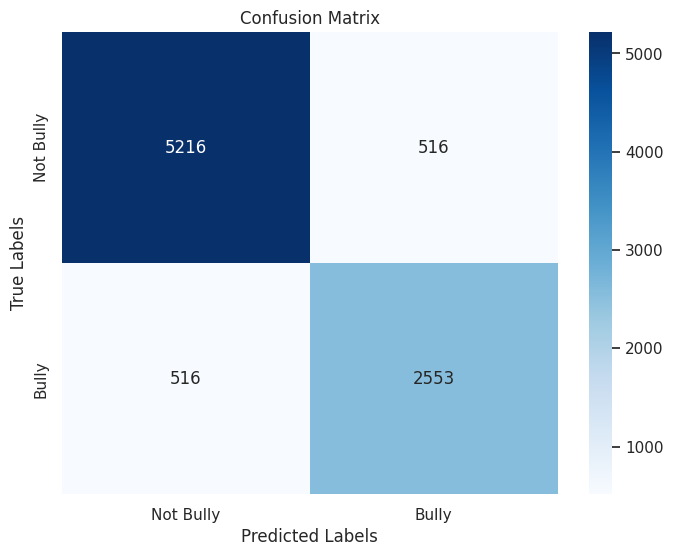

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = ['Not Bully', 'Bully']

# Step 2: Compute confusion matrix
cm = confusion_matrix(Y_test.argmax(axis=1), predictions.argmax(axis=1))

# Step 3: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(Y_test.argmax(axis=1), predictions.argmax(axis=1))
print("Confusion Matrix:")
print(confusion_mat)



Confusion Matrix:
[[5216  516]
 [ 516 2553]]


In [ ]:
import numpy as np

predicted_labels = np.argmax(predictions, axis=1)



In [ ]:

predicted_labels.shape

(8801,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_test, predicted_labels)
report = classification_report(Y_test, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(report)


ValueError: ignored

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, predicted_labels, average='samples')


ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report

# Reshape the arrays
y_test_reshaped = Y_test.reshape(-1, 1)
predicted_labels_reshaped = predicted_labels.reshape(-1, 1)

# Generate the classification report
report = classification_report(y_test_reshaped, predicted_labels_reshaped)
print("Classification Report:")
print(report)


ValueError: ignored

In [ ]:
print("Shape of y_test:", Y_test.shape)
print("Shape of predicted_labels:", predicted_labels.shape)


Shape of y_test: (8801, 2)
Shape of predicted_labels: (8801,)


In [ ]:
import numpy as np

predicted_labels_reshaped = np.reshape(predicted_labels, (8801, 1))


In [ ]:
from sklearn.metrics import classification_report
target_names = ['not bully', 'bully']
report = classification_report(Y_test,predicted_labels_reshaped , target_names=target_names)
print("Classification Report:")
print(report)



ValueError: ignored

In [ ]:
accr = model.evaluate(X_test,Y_test)

276/276 [==============================] - 34s 118ms/step - loss: 0.2918 - accuracy: 0.8827


ValueError: ignored

k-fold cross validation

In [ ]:
#Perform k-fold cross-validation
import numpy as np
from sklearn.model_selection import KFold
num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True)
fold_accuracy_scores = []

for fold, (train_indices, val_indices) in enumerate(kfold.split(X)):
    print(f'Fold {fold+1}/{num_folds}')

    # Split data into train and validation sets
    train_data = X[train_indices]
    train_labels = Y[train_indices]
    val_data = X[val_indices]
    val_labels = Y[val_indices]


    batch_size = 128
    model.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0005),metrics = ['accuracy'])
    history = model.fit(train_data, train_labels, epochs = 10, batch_size=batch_size,verbose = 1,callbacks = callback_list, validation_data =(val_data,val_labels))

    # Predict labels on the validation set

    accr = model.evaluate(val_data,val_labels)


    fold_accuracy_scores.append(accr)
    print(f'Validation Accuracy: {accr}')

# Calculate and print the average accuracy across all folds
avg_accuracy = np.mean(fold_accuracy_scores)
print(f'Average Accuracy: {avg_accuracy}')

Fold 1/5
Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
batch_size = 64
model.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0005),metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, verbose = 1,callbacks = callback_list, validation_data =(X_test, Y_test))

Epoch 1/20
549/550 [============================>.] - ETA: 0s - loss: 0.2038 - accuracy: 0.9057
Epoch 1: val_accuracy did not improve from 0.91818
550/550 [==============================] - 16s 21ms/step - loss: 0.2040 - accuracy: 0.9056 - val_loss: 0.1986 - val_accuracy: 0.9106
Epoch 2/20
550/550 [==============================] - ETA: 0s - loss: 0.1995 - accuracy: 0.9079
Epoch 2: val_accuracy did not improve from 0.91818
550/550 [==============================] - 10s 18ms/step - loss: 0.1995 - accuracy: 0.9079 - val_loss: 0.2039 - val_accuracy: 0.9056
Epoch 3/20
548/550 [============================>.] - ETA: 0s - loss: 0.1963 - accuracy: 0.9089
Epoch 3: val_accuracy did not improve from 0.91818
550/550 [==============================] - 11s 20ms/step - loss: 0.1962 - accuracy: 0.9091 - val_loss: 0.2067 - val_accuracy: 0.9050
Epoch 4/20
550/550 [==============================] - ETA: 0s - loss: 0.1942 - accuracy: 0.9123
Epoch 4: val_accuracy did not improve from 0.91818
550/550 [====

combine

In [ ]:
combine=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pandas/Combine.csv')

In [ ]:
combine

,Unnamed: 0,Comment,Label
0,0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Bully
1,1,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছি...,Bully
2,2,অরে বাবা এই টা কোন পাগল,Bully
3,3,ক্যাপ্টেন অফ বাংলাদেশ,Bully
4,5,অন্যরকম ভালো লাগলো,Bully
...,...,...,...
44679,4995,erum chahara loya gf asha koros,Bully
44680,4996,tor durga radha ke bol amake shukh dia jete,Bully
44681,4997,tora nun puja korish,Bully
44682,4998,malaun bachchader dekhle bojha jau malura koto...,Bully


In [ ]:

stp = open(path+'bangla_stopwords.txt','r',encoding='utf-8').read().split()
def process_news(row):
  news = row.replace('\n', '') #removing new line
 # news = re.sub('[^\u0980-\u09FF]',' ',str(news)) #removing unnecessary punctuation
  result = news.split()
  news = [word.strip() for word in result if word not in stp ]
   #reviews =" ".join(reviews)
  return news

In [ ]:
# Apply the function into the dataframe
combine['Comment'] = combine['Comment'].apply(process_news)
# convert the Text column into a list
review_data_list = combine['Comment'].values.tolist()

In [ ]:
review_data_list

[['হালার',
  'পুত',
  'মদ',
  'খাওয়ার',
  'সময়',
  'রাতের',
  'বেলা',
  'মদ',
  'খাই',
  'দিনের',
  'বেলাও',
  'মাঝেমধ্যে',
  'খায়',
  'ম',
  'চ',
  'সময়',
  'একটু',
  'চুদাম',
  'ইচ্ছা',
  'চুদার',
  'লাইনে',
  'দারা',
  'একজন',
  'একজন',
  'জাবি'],
 ['ঘরে', 'শুট', 'কেমন', 'লেগেছে', 'ক্যামেরাতে'],
 ['অরে', 'বাবা', 'টা', 'পাগল'],
 ['ক্যাপ্টেন', 'অফ', 'বাংলাদেশ'],
 ['অন্যরকম', 'ভালো', 'লাগলো'],
 ['সাংবাদিক',
  'ভাইদের',
  'বলছি',
  'সংবাদ',
  'প্রচার',
  'করলেই',
  'থ',
  'গ্রেডের',
  'অভিনেত্রী',
  'অভিনেতা',
  'দের',
  'আপনারা',
  'জনপ্রিয়',
  'শব্দটা',
  'জনপ্রিয়',
  'কাস্টিং',
  'কাউচের',
  'সুযোগে',
  'অভিনেত্রী',
  'অভিনেতা',
  'প্লিজ',
  'তেলবাজি',
  'নিউজ',
  'ইম্পোরটেন্ট',
  'দেয়া',
  'বন্ধ',
  'করুন'],
 ['মোহাম্মদ', 'কফিল', 'উদ্দীন', 'মাহমুদ'],
 ['ঢাকায়',
  'ঘনো',
  'ঘনো',
  'আগুন',
  'লাগার',
  'মূল',
  'কারন',
  'টা',
  'এতদিনে',
  'পারলাম',
  'সবই',
  'আল্লাহর',
  'গজব',
  'ফাবি',
  'আইয়ে',
  'আলায়ে',
  'রাব্বি',
  'কুমাতু',
  'কায্জিবান'],
 ['হিরো', 'আলম', 'এগিয়ে', 'চল

In [ ]:
import multiprocessing

In [ ]:
#Train a Word2Vec model using Gensim
import gensim
Embedding_Dim = 100
#train word2vec model
model = word2vec.Word2Vec(sentences = review_data_list, vector_size = Embedding_Dim,window=5, min_count=2,negative=3,workers=multiprocessing.cpu_count()-1,sg=0,)
#Vocabulary size
words = list(model.wv.key_to_index)
print('Here is the Vocabulary Size.. %d' % len(words))

Here is the Vocabulary Size.. 26565


In [ ]:
#Finding similar words
print(model.wv.most_similar('oi', topn=5))

[('manush', 0.9984831213951111), ('mon', 0.9979705214500427), ('eta', 0.997787356376648), ('bal', 0.9976754188537598), ('kintu', 0.9976745247840881)]


In [ ]:
words = list(model.wv.key_to_index)
print('Vocabulary size: %d' % len(words))

# save model
filename = 'embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

Vocabulary size: 26565


In [ ]:
from tqdm import tqdm
embedding_vector = {}
f = open('./embedding_word2vec.txt')
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef

0it [00:00, ?it/s]


NameError: ignored

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout,Conv1D,MaxPooling1D,Flatten

In [ ]:
max_features =  26565
tokenizer = Tokenizer(num_words = max_features, )
tokenizer.fit_on_texts(combine['Comment'].values)
X = tokenizer.texts_to_sequences(combine['Comment'].values)
X = pad_sequences(X, padding = 'post' ,maxlen=120)
Y = pd.get_dummies(combine['Label']).values

vocab_size = len(tokenizer.word_index)+1

In [ ]:
import numpy as np

In [ ]:
embedding_matrix = np.zeros((vocab_size,100))
for word,i in tqdm(tokenizer.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

100%|██████████| 66285/66285 [00:00<00:00, 1364780.52it/s]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(35747, 120) (35747, 2)
(8937, 120) (8937, 2)


final model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=X.shape[1], weights=[embedding_matrix], trainable=True))
model.add(Conv1D(128, 5, activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='sigmoid'))


In [ ]:
embid_dim = 100
lstm_out = 100


model = keras.Sequential()
model.add(Embedding(vocab_size, embid_dim, input_length =X.shape[1], weights = [ embedding_matrix] , trainable = False))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.3)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))

model.add(Dense(2, activation = 'sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 100)          6628600   
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 128)               25728     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 2)                 130       
                                                      

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 100)          6628600   
                                                                 
 conv1d_6 (Conv1D)           (None, 116, 128)          64128     
                                                                 
 conv1d_7 (Conv1D)           (None, 114, 64)           24640     
                                                                 
 conv1d_8 (Conv1D)           (None, 112, 32)           6176      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 56, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_3 (Bidirectio  (None, 56, 512)          591872    
 nal)                                                 

In [ ]:
accuracy_threshold=0.97
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = path+"ModelcombineUP.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint]

In [ ]:
batch_size = 128
model.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.01),metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs =10, batch_size=batch_size, verbose = 1,callbacks = callback_list, validation_data =(X_test, Y_test))

Epoch 1/10
 52/280 [====>.........................] - ETA: 6:49 - loss: 8.2641 - accuracy: 0.9527

KeyboardInterrupt: ignored

In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/NLP Projects/Modelcombine.h5'  # Replace with the actual path of your saved model
model = tf.keras.models.load_model(model_path)

In [ ]:
from sklearn.metrics import classification_report
predictions=model.predict(X_test)
target_names = ['not bully', 'bully']
report = classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=target_names)
print("Classification Report:")
print(report)

280/280 [==============================] - 48s 165ms/step
Classification Report:
              precision    recall  f1-score   support

   not bully       0.99      0.98      0.98      8494
       bully       0.64      0.73      0.68       443

    accuracy                           0.97      8937
   macro avg       0.81      0.85      0.83      8937
weighted avg       0.97      0.97      0.97      8937



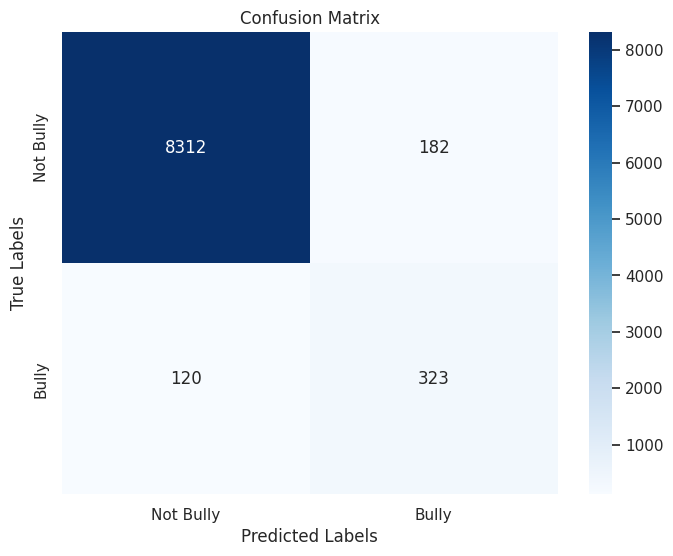

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels = ['Not Bully', 'Bully']

# Step 2: Compute confusion matrix
cm = confusion_matrix(Y_test.argmax(axis=1), predictions.argmax(axis=1))

# Step 3: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

280/280 [==============================] - 47s 159ms/step - loss: 0.1301 - accuracy: 0.9662
Test set
  Loss: 0.130
  Accuracy: 0.966


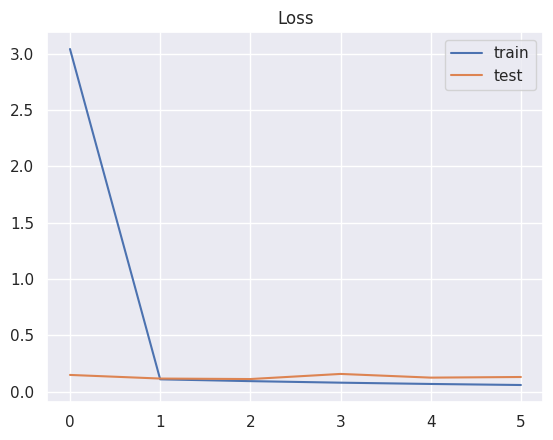

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

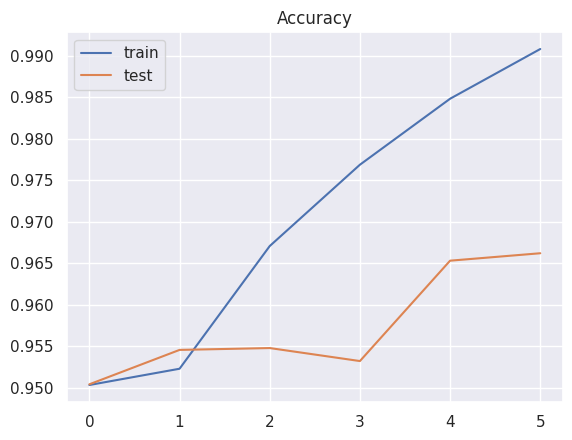

In [ ]:

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:

# Save the word2vec model into a pickle file
import pickle
file = open(path+'word2vec_model.pkl','wb')
pickle.dump(model,file)

In [ ]:
model = pickle.load(open(path+'word2vec_model.pkl','rb'))
model.wv.most_similar('বাল')


EOFError: ignored

In [ ]:
pip install -U bnlp_toolkit

In [ ]:
Y = pd.get_dummies(df1['label']).values
print('Shape of label tensor:', Y.shape)

In [ ]:
Y

In [ ]:
!pip install fasttext==0.9.2

In [ ]:
from bnlp.embedding.fasttext import BengaliFasttext
bft = BengaliFasttext()
word = "গ্রাম"
model_path = "/content/drive/MyDrive/Colab Notebooks/data and pickle files/Bengali_FastText_DIM20.model"
word_vector = bft.generate_word_vector(model_path, word)
print(word_vector.shape)
print(word_vector)

In [ ]:
import numpy as np
import seaborn as sns
import re,nltk,json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(42)
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
def dataset_split(Comment,category):
    """
    This function will return the splitted (90%-10%-10%) feature vector .

    Args:
        headlines: sequenced headlines
        category: encoded lables (array)

    Returns:
        X_train: training data
        X_valid: validation data
        X_test : testing feature vector
        y_train: training encoded labels (array)
        y_valid: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X,X_test,y,y_test = train_test_split(Comment,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print(color.BOLD+"\nDataset Distribution:\n"+color.END)
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(Comment),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))

    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [ ]:
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(df1.Comment,Y)

In [ ]:

vocab_size = 10000
embedding_dim = 64
max_length = 20
trunc_type='post'
padding_type='post'
oov_tok = ""

def padded_headlines(original,encoded,padded):
  '''
  print the samples padded headlines
  '''
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\n")
  print(original,"\n",encoded)
  print(color.BOLD+"\n\t\t\t====== Paded Sequences ======\n"+color.END,original,"\n",padded)

In [ ]:

# Train Data Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

In [ ]:
 #============================== Tokenizer Info =================================
(word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
def tokenizer_info(mylist,bool):
  ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
  for w,c in ordered[:10]:
    print(w,"\t",c)
  #=============================== Print all the information =========================
print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)
print("Words --> Counts:")
tokenizer_info(word_counts,bool =True )
print("\nWords --> Documents:")
tokenizer_info(word_docs,bool =True )
print("\nWords --> Index:")
tokenizer_info(word_index,bool =True )
print("\nTotal Documents -->",document_count)
print(f"Found {len(word_index)} unique tokens")

In [ ]:
padded_headlines(X_train[10],train_sequences[10],train_padded[10])

In [ ]:
# Validation Data Tokenization
validation_sequences = tokenizer.texts_to_sequences(X_valid)
validation_padded = pad_sequences(validation_sequences, padding=padding_type , maxlen=max_length)
padded_headlines(X_valid[18369],validation_sequences[1],validation_padded[1])


In [ ]:
X_valid

In [ ]:

# Test Data Tokenization
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=padding_type , maxlen=max_length)
padded_headlines(X_test[27642],test_sequences[100],test_padded[100])

In [ ]:
X_test

In [ ]:
# Labels Tokenization
#label_tokenizer = Tokenizer()
#label_tokenizer.fit_on_texts(dataset.category)

train_label_seq = y_train
valid_label_seq = y_valid
testing_label_seq = y_test


last code

In [ ]:
X = data['Comment'].values

In [ ]:
# The maximum number of words to be used. (most frequent)agei 50000 with length 250
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed 100.
EMBEDDING_DIM = 100

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['Comment'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

In [ ]:
X = tokenizer.texts_to_sequences(data['Comment'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/data and pickle files/"
embid_dim = 128

In [ ]:
keras.backend.clear_session()
accuracy_threshold = 0.97
# vocab_size = 10000
# embedding_dim = 128
# max_length = 50
num_category = 2

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = path+"ModelG.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint]
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embid_dim, input_length =X.shape[1], weights = [ embedding_matrix] , trainable = False),
    tf.keras.layers.Bidirectional(GRU(64,dropout=0.3)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

In [ ]:
batch_size = 64
model.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.01),metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs =15, batch_size=batch_size, verbose = 1,callbacks = callback_list, validation_data =(X_test, Y_test))

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
# Define the number of folds for cross-validation
num_folds = 5

# Define the KFold object and split the data
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
fold = 0

# Iterate over each fold
for train_index, val_index in kf.split(X_train):
    fold += 1
    print(f'Fold {fold}')

    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = Y_train[train_index], Y_train[val_index]

    # Compile the model for this fold
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

    # Train the model for this fold
    model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=10, batch_size=32)

    # Evaluate the model on the test data for this fold
    test_loss, test_acc = model.evaluate(X_test, Y_test)
    print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')




BIlstm


In [ ]:
def label_encoding(dataset,bool):
  '''
  This function will convert categorical class names into a numeric label

  Args:
  dataset: A dataset
  bool : a boolean (True or False)

  returns:
  labels: encoded labels
  '''
  le = LabelEncoder()
  le.fit(dataset.label)
  encoded_labels = le.transform(dataset.label)
  labels = np.array(encoded_labels) # Converting into numpy array
  class_names =le.classes_ ## Define the class names again
  if bool == True:
    print(color.BOLD+"\n\t\t\t===== Label Encoding ====="+color.END,"\nClass Names:-->",le.classes_)
  return labels

                   #===========================================================
                   ################# Dataset Splitting Function ###############
                   #===========================================================

def dataset_split(news,category):
  X,X_test,y,y_test = train_test_split(news,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
  X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  print(color.BOLD+"Feature Size :======>"+color.END,X_train.shape[1])
  print(color.BOLD+"\nDataset Distribution:\n"+color.END)
  print("\tSet Name","\t\tSize")
  print("\t========\t\t======")

  print("\tFull\t\t\t",news.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0],
        "\n\tValidation\t\t",X_valid.shape[0])

  return X_train,X_valid,X_test,y_train,y_valid,y_test

tkenizer

In [ ]:
def encoded_texts(df1,padding_length,max_words):

  '''
  This function will encoded the text into a sequence of numbers

  Args:
  dataset: a dataset
  padding_length: maximum length of a encoded texte
  max_words : Number of words

  returns:
  corpus: Number of encoded texts
  labels: encoded labels
  '''

  tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='', document_count=0)



 # Fit the tokenizer
  tokenizer.fit_on_texts(df1.Comment)
  #============================== Tokenizer Info =================================
  (word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
  def tokenizer_info(mylist,bool):
    ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
    for w,c in ordered[:10]:
      print(w,"\t",c)
  #=============================== Print all the information =========================
  print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)
  print("Words --> Counts:")
  tokenizer_info(word_counts,bool =True )
  print("\nWords --> Documents:")
  tokenizer_info(word_docs,bool =True )
  print("\nWords --> Index:")
  tokenizer_info(word_index,bool =True )
  print("\nTotal Documents -->",document_count)

  #=========================== Convert string into list of integer indices =================
  sequences = tokenizer.texts_to_sequences(df1.Comment)
  word_index = tokenizer.word_index
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\nFound {} unique tokens".format(len(word_index)))
  print(df1.Comment[10],"\n",sequences[10])

  #==================================== Pad Sequences ==============================
  corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
  print("\n\t\t\t====== Paded Sequences ======\n",df1.Comment[102],"\n",corpus[102])

  #=================================     Label Encoding ================================
  labels = label_encoding(df1,True)
  return corpus,labels

#call the function
num_words = 5000
corpus,labels = encoded_texts(df1,
                                300,num_words)
print("\nShape of Encoded Corpus =====>",corpus.shape)



In [ ]:
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(corpus,labels)

Model Defination

In [ ]:
path="/content/drive/MyDrive/Numpy/"

In [ ]:

# embedding_dimension = 128
# input_length = 300
# vocab_size = 5000
num_classes = 2
batch_size = 64
num_epochs = 15

accuracy_threshold = 0.97


class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = path+"ModelCNN-LSTM.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint]

                            ###############################     CNN network architecture ################
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, embid_dim, input_length =X.shape[1], weights = [ embedding_matrix] , trainable = False),
tf.keras.layers.Conv1D(128, 5, activation= 'relu'),
tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(64, return_sequences=True,dropout = 0.3)),
tf.keras.layers.Bidirectional(LSTM(32, return_sequences=True,dropout = 0.2)),
tf.keras.layers.Dense(28, activation='relu'),
keras.layers.Flatten(),
tf.keras.layers.Dense(2 , activation='sigmoid')])

model.summary()

model.compile(optimizer=keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy'])


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD,Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

In [ ]:
with tf.device('/gpu:0'):
    model= Sequential()
    model.add(Embedding(vocab_size, embid_dim, input_length =X.shape[1], weights = [ embedding_matrix] , trainable = False))
    model.add(Conv1D(128, 5, activation = "relu"))
    model.add(MaxPooling1D(5))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.3))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(28, activation='relu'))
    model.add(Dense(28, activation='relu'))
    model.add(Flatten())
    #l2 regularizer
    model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
    model.add(Dense(2, activation='sigmoid'))
    #sgd= SGD(lr=0.0001,decay=1e-6,momentum=0.9,nesterov=True)
    adam=Adam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
    model.summary()
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [ ]:
batch_size = 64
model.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam(),metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs =15, batch_size=batch_size, verbose = 1,callbacks = callback_list, validation_data =(X_test, Y_test))

In [ ]:
# save the model
tf.keras.models.save_model(model, path+'Document.h5', save_format='h5')
#model.save(path+'Document_Categorization.h5')

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
sns.set_style('darkgrid')
                  #=========================================================
                  ############### Epochs vs Validation Accuracy Plot ##########
                  #==========================================================

plt.plot(epochs, acc, color='midnightblue', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_acc, color='darkred', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation accuracy',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
plt.legend(['Training Accuracy','Validation Accuracy'])

In [ ]:

# Load the saved model
model = load_model(path+'Document_Categorization.h5')

In [ ]:
class_names = ['Bully' ,'Not Bully']
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
report = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
report = report.rename(index={'0': 'Bully','1':'Not Bully'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

280/280 [==============================] - 56s 195ms/step


NameError: ignored